In [50]:
import pandas as pd 
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt

# libraries for model 
from sklearn.ensemble import ExtraTreesRegressor

# libraries for splitting data
from sklearn.model_selection import train_test_split

# libraries for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# parameter tuning for Model
from sklearn.model_selection import GridSearchCV
import seaborn as sns


In [51]:

# Read the CSV file
csv = pd.read_csv('YearPredictionMSD.csv', header=None)

# Convert the first column to int16
csv[0] = csv[0].astype('int16')

# Convert the rest of the columns to float32
for col in csv.columns[1:]:
    csv[col] = csv[col].astype('float32')

data = csv
data1 = csv
labels = csv.iloc[:, 0]

In [1]:


# Original feature distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[3], kde=True)
plt.title('Data[1]')


NameError: name 'plt' is not defined

In [53]:
data1[1]

0         49.943569
1         48.732151
2         50.957142
3         48.247501
4         50.970200
            ...    
515340    51.284672
515341    49.878700
515342    45.128521
515343    44.166142
515344    51.857262
Name: 1, Length: 515345, dtype: float32

In [54]:
missing_values = data.isnull().sum()

if missing_values.any(): # Check for missing values
    print('Missing values found')
    data.dropna(inplace=True)  # Remove missing values
    print(missing_values, 'missing values removed')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)  # Adjust the test_size as needed

X_train.head()


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
443175,2000,40.767551,-3.908670,-11.071390,-12.268940,-30.960440,-16.543100,-2.249580,-2.77860,6.54118,...,23.040810,173.926605,-45.999901,46.348228,18.941311,17.021009,-50.345661,0.962940,95.505821,1.440370
401815,2004,49.247219,19.324329,57.906288,20.305531,-1.567960,-16.969231,29.507090,-2.26173,-3.79348,...,-11.179430,-119.327637,-161.044083,-124.699661,-23.299290,53.988682,-154.863434,10.251220,256.529816,1.591410
370593,2004,26.074650,-20.131720,-10.686540,-21.566299,7.425080,-4.690280,-27.377480,-0.58113,-0.07939,...,32.590031,-278.681000,277.180817,-10.704140,-24.451040,114.025482,222.794067,10.770580,147.939636,26.416790
502186,1981,47.054062,51.940479,61.585220,-3.470750,-38.991138,-12.569330,-22.698521,-0.14984,5.40617,...,-0.496750,-53.070549,-135.951111,-191.249863,-4.544060,17.852680,-706.764038,12.688340,135.293198,90.758888
435101,1996,42.069530,33.552761,-56.957909,27.304520,6.052770,-1.784980,-6.342070,-25.65892,-9.85183,...,6.518150,-217.040054,51.322811,30.894140,1.776110,51.509178,237.488464,20.181231,62.120991,42.396702


In [58]:
import warnings
warnings.filterwarnings('ignore')

# Model Before Hyperparameter Tuning
model = ExtraTreesRegressor(n_estimators=200, random_state=42, n_jobs= -1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)


print('MSE:',mse)
print('RMSE:',rmse)
print('mae:',mae)
print('r-squared:',r_squared)


# MSE: 8.265215535225159e-06
# RMSE: 0.0028749287878528677
# mae: 6.75518342082961e-05
# r-squared: 0.9999999309584789


KeyboardInterrupt: 

In [ ]:
tuned_model = ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs= -1, max_depth= 60)
tuned_model.fit(X_train, y_train)

predictions = tuned_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)


print('MSE:',mse)
print('RMSE:',rmse)
print('mae:',mae)
print('r-squared:',r_squared)

# MSE: 1.0618032580116232
# RMSE: 1.0304383814724796
# mae: 0.14420436794768554
# r-squared: 0.9911304778859288

In [57]:
tuned_model2 = ExtraTreesRegressor(n_estimators=200, random_state=42, n_jobs= -1, max_depth= 60, min_samples_split= 4)
tuned_model2.fit(X_train, y_train)

predictions = tuned_model2.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy * 100}")
print('MSE:',mse)
print('RMSE:',rmse)
print('mae:',mae)
print('r-squared:',r_squared)

# MSE: 0.8958949829725718
# RMSE: 0.9465172914281977
# mae: 0.10533720129233815
# r-squared: 0.9925163533795884

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

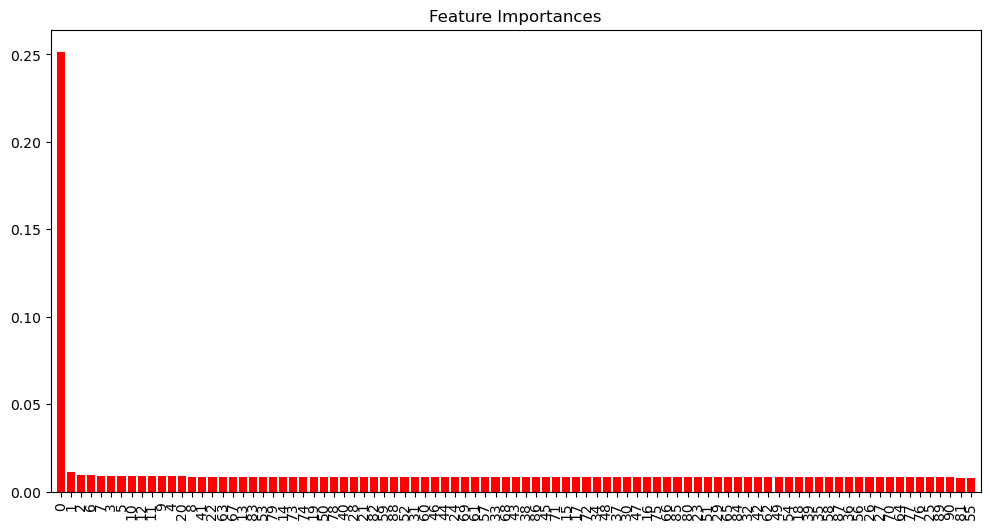

In [15]:
feature_importances = tuned_model2.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()